## Ajuste por maximización de Posterior

In [1]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

In [2]:
data = np.load('fit_exercise.npy') #Cargamos el archivo de datos
n = len(data[0])
va = np.var(data[1])

### Los datos usados están compuestos de un arreglo de 3 subarreglos de 50 mediciones, donde el primer subarreglo son los datos de $x$, el segundo son de $y$ y el tercero son los errores en $y$

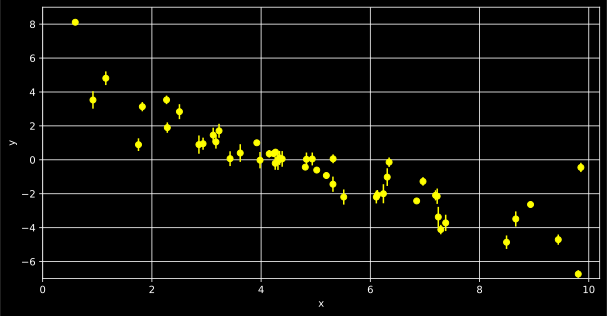

In [3]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10,5)
plt.errorbar(data[0], data[1], yerr=data[2], xerr = 0, fmt='o', color='yellow')
plt.ylim((-7, 9))
plt.xlim((0, 10.2))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Los datos aparentan ajustarse con una función lineal $ax + b$. Se usará el likelihood gaussiano, encontrando el valor de los parámetros que lo maximiza.
## Lo que buscamos es el posterior:
## $P(y,\theta) \propto P(y|\theta)P(\theta)$ donde $P(y|\theta)$ es el likelihood y $P(\theta)$ es el prior, que para este caso será plano, y el likelihood:
## $\mathbf{L} \; \propto \; \prod_{i}^{n}\frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(y_i-\lambda(x_i,\theta))^2}{2\sigma^2}}$
## $\ln{(\mathbf{L})} \; \propto \; -\frac{-n}{2}\ln{(2\pi \sigma^2)}-\frac{1}{2\sigma^2}\sum_i^n(y_i-\lambda(x_i,\theta))^2$
### Donde $\lambda(x_i,\theta)$ es el modelo y $\sigma^2$ la varianza de los $y_i$

In [4]:
def likeli(w3,w4):
    llt = 0
    prior = 1                              #Aquí se define el prior
    ll = -(n/2)*np.log(2*np.pi*va)
    for i in range (n):
        fx = data[0,i]*w3 + w4             #Aquí va el modelo
        llt+= -(data[1,i]-fx)**2
    ll += (1/(2*va))*llt + np.log(prior)
    ll = np.exp(ll)
    return ll

In [5]:
def caminante(mm,camt,camt2):
    cami = np.array([camt[0]])
    cami2 = np.array([camt2[0]])
    aux = cami[0]
    aux2 = cami2[0]
    tt = likeli(camt[0],camt2[0])
    for j in range (mm-1):
        irma = np.random.normal(loc=aux, scale=0.2)        #Aquí se calculan números aleatorios de
        kari = np.random.normal(loc=aux2, scale=0.2)       #Distribución normal centrada en los valores iniciales
        camt[j+1] = irma                                   #Cada par de valores se guarda en estos arreglos                                                
        camt2[j+1] = kari
        ttn = likeli(camt[j+1],camt2[j+1])
        if ttn>tt:
            cami = np.append(cami,irma)                    #Solo los exitosos se guardan en estos arreglos 
            cami2 = np.append(cami2,kari)                  #Para graficarlos después
            aux = irma
            aux2 = kari
            tt = ttn
        else:
            ran = np.random.uniform(low=0.0, high=1.0)     #"Volado"
            if (abs(ttn/tt))>ran:
                cami = np.append(cami,irma)
                cami2 = np.append(cami2,kari)
                aux = irma
                aux2 = kari
                tt = ttn
    return cami,cami2,camt,camt2

In [6]:
m = 12000                  #número de intentos de pasos del caminante
cam = np.zeros(m)         
cam2 = np.zeros(m)
cam[0] = 0
cam2[0] = 2
cam,cam2,camtt,camtt2 = caminante(m,cam,cam2)

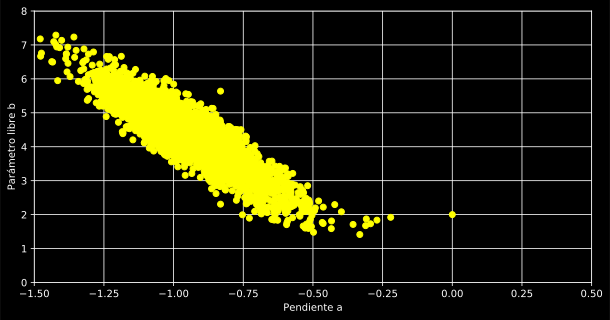

In [7]:
plt.rcParams['figure.figsize'] = (10,5)
plt.errorbar(cam, cam2, fmt='o', color='yellow')
plt.ylim((0, 8))
plt.xlim((-1.5, 0.5))
plt.xlabel('Pendiente a')
plt.ylabel('Parámetro libre b')
plt.grid()
plt.show()

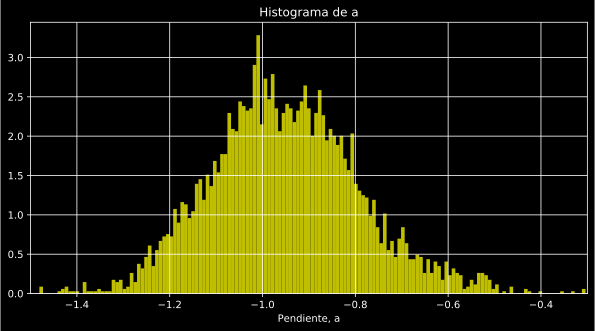

In [8]:
k, bins, patches = plt.hist(cam, 200, density=True, facecolor='y', alpha=1)
plt.xlabel('Pendiente, a')
#plt.ylabel('Probability')
plt.title('Histograma de a')
plt.xlim(-1.5, -0.3)
plt.grid(True)
plt.show()

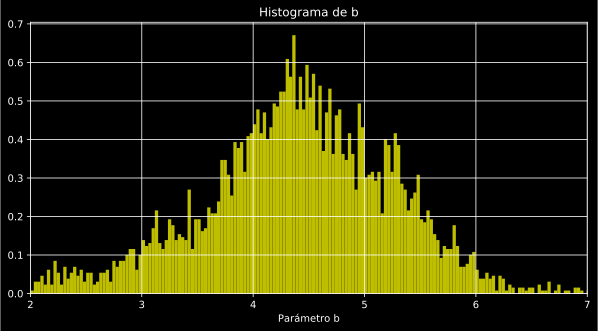

In [9]:
k, bins, patches = plt.hist(cam2, 200, density=True, facecolor='y', alpha=1)
plt.xlabel('Parámetro b')
#plt.ylabel('Probability')
plt.title('Histograma de b')
plt.xlim(2, 7)
plt.grid(True)
plt.show()

In [10]:
a = np.mean(cam)
b = np.mean(cam2)

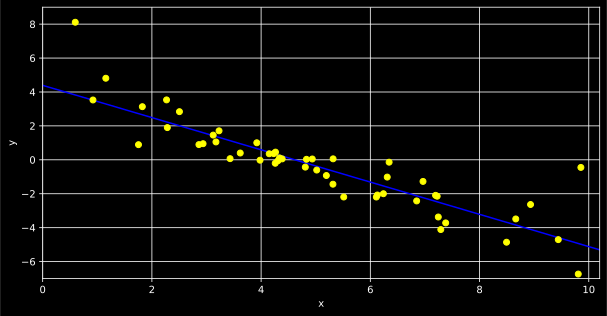

In [11]:
x = np.arange(-0.2,10.5,0.1)
plt.rcParams['figure.figsize'] = (10,5)
plt.errorbar(data[0], data[1], yerr=0.07, xerr = 0, fmt='o', color='yellow')
plt.plot(x,(x*a + b),color='blue')
plt.xlim((0, 10.2))
plt.ylim((-7, 9))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()